# Feature Observers

In [7]:
import matplotlib.pyplot as plt

from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.dispatching.feature_observers import (
    feature_observer_factory,
    FeatureObserverType,
    CompositeFeatureObserver,
    EarliestStartTimeObserver,
)
from job_shop_lib.dispatching import (
    Dispatcher,
    HistoryObserver,
    PruningFunction,
    composite_pruning_function_factory,
)
from job_shop_lib.dispatching.rules import (
    DispatchingRuleSolver,
    DispatchingRuleType,
)
from job_shop_lib.visualization import (
    plot_gantt_chart,
    plot_gantt_chart_wrapper,
    plot_disjunctive_graph,
)

plt.style.use("ggplot")

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [
    Operation(CPU, 1),
    Operation(GPU, 1),
    Operation(DATA_CENTER, 7),
    Operation(CPU, 2),
]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

example_job_shop_instance = JobShopInstance(jobs, name="Example")

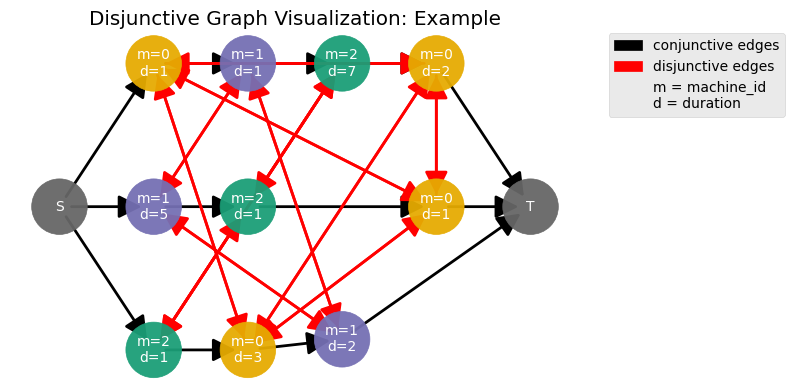

In [8]:
_ = plot_disjunctive_graph(example_job_shop_instance)

In [9]:
pruning_function = composite_pruning_function_factory(
    [
        PruningFunction.DOMINATED_OPERATIONS,
        # PruningFunction.NON_IMMEDIATE_MACHINES,
    ]
)
dispatcher = Dispatcher(example_job_shop_instance, pruning_function=pruning_function)

feature_observers = [
    feature_observer_factory(feature_observer_type, dispatcher=dispatcher)
    for feature_observer_type in FeatureObserverType
    if feature_observer_type != FeatureObserverType.COMPOSITE
]
ealiest_start_time_observer = [
    fo for fo in feature_observers if isinstance(fo, EarliestStartTimeObserver)
][0]
history = HistoryObserver(dispatcher)
composite = CompositeFeatureObserver(
    dispatcher, feature_observers=feature_observers
)

print(ealiest_start_time_observer.earliest_start_times)
print(composite)

[[ 0.  1.  2.  9.]
 [ 0.  5.  6. nan]
 [ 0.  1.  4. nan]]
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      1.0                0.0       1.0          0.0            0.0          0.0
1      0.0                1.0       1.0          0.0            1.0          0.0
2      0.0                2.0       7.0          0.0            2.0          0.0
3      0.0                9.0       2.0          0.0            3.0          0.0
4      1.0                0.0       5.0          0.0            0.0          0.0
5      0.0                5.0       1.0          0.0            1.0          0.0
6      0.0                6.0       1.0          0.0            2.0          0.0
7      1.0                0.0       1.0          0.0            0.0          0.0
8      0.0                1.0       3.0          0.0            1.0          0.0
9      0.0                4.0       2.0          0.0            2.0  

------------------- Step 1 -------------------
Scheduled operation: S-Op(operation=O(m=0, d=1, j=0, p=0), start_time=0, machine_id=0)
Current time: 0
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0                0.0       1.0          1.0            0.0          0.0
1      1.0                1.0       1.0          0.0            0.0          0.0
2      0.0                2.0       7.0          0.0            1.0          0.0
3      0.0                9.0       2.0          0.0            2.0          0.0
4      1.0                0.0       5.0          0.0            0.0          0.0
5      0.0                5.0       1.0          0.0            1.0          0.0
6      0.0                6.0       1.0          0.0            2.0          0.0
7      1.0                0.0       1.0          0.0            0.0          0.0
8      0.0                1.0       3.0          0.0      

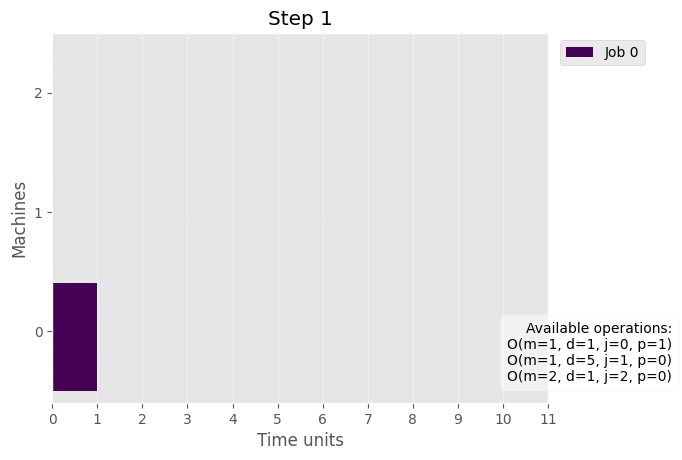

------------------- Step 2 -------------------
Scheduled operation: S-Op(operation=O(m=1, d=1, j=0, p=1), start_time=1, machine_id=1)
Current time: 0
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0                0.0       1.0          1.0            0.0          0.0
1      0.0                1.0       1.0          1.0            0.0          0.0
2      0.0                2.0       7.0          0.0            0.0          0.0
3      0.0                9.0       2.0          0.0            1.0          0.0
4      1.0                2.0       5.0          0.0            0.0          0.0
5      0.0                7.0       1.0          0.0            1.0          0.0
6      0.0                8.0       1.0          0.0            2.0          0.0
7      1.0                0.0       1.0          0.0            0.0          0.0
8      0.0                1.0       3.0          0.0      

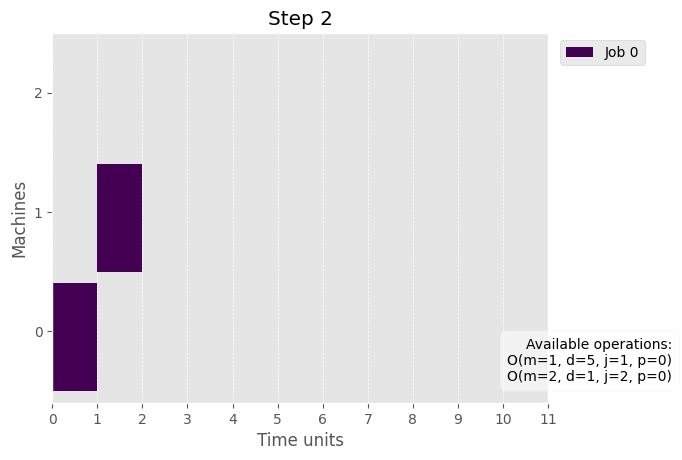

------------------- Step 3 -------------------
Scheduled operation: S-Op(operation=O(m=1, d=5, j=1, p=0), start_time=2, machine_id=1)
Current time: 0
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0                0.0       1.0          1.0            0.0          0.0
1      0.0                1.0       1.0          1.0            0.0          0.0
2      0.0                2.0       7.0          0.0            0.0          0.0
3      0.0                9.0       2.0          0.0            1.0          0.0
4      0.0                2.0       5.0          1.0            0.0          0.0
5      0.0                7.0       1.0          0.0            0.0          0.0
6      0.0                8.0       1.0          0.0            1.0          0.0
7      1.0                0.0       1.0          0.0            0.0          0.0
8      0.0                1.0       3.0          0.0      

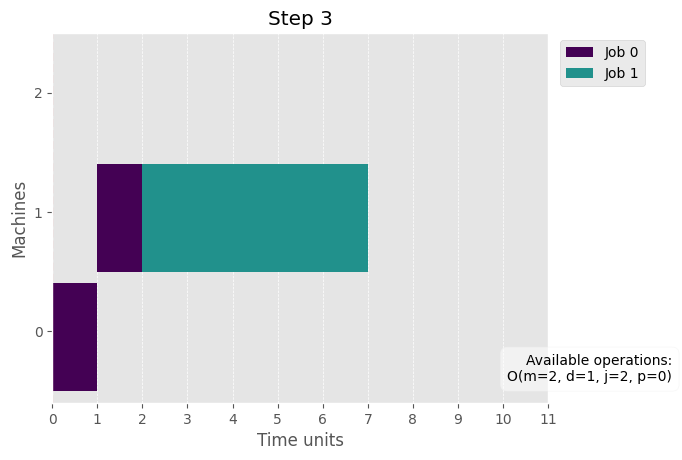

------------------- Step 4 -------------------
Scheduled operation: S-Op(operation=O(m=2, d=1, j=2, p=0), start_time=0, machine_id=2)
Current time: 1
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0               -1.0       1.0          1.0            0.0          1.0
1      0.0                0.0       1.0          1.0            0.0          0.0
2      1.0                1.0       7.0          0.0            0.0          0.0
3      0.0                8.0       2.0          0.0            1.0          0.0
4      0.0                1.0       5.0          1.0            0.0          0.0
5      1.0                6.0       1.0          0.0            0.0          0.0
6      0.0                7.0       1.0          0.0            1.0          0.0
7      0.0               -1.0       0.0          1.0            0.0          1.0
8      1.0                0.0       3.0          0.0      

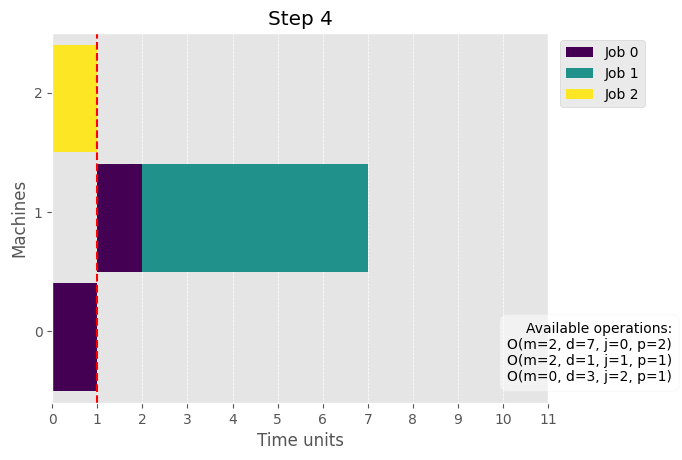

------------------- Step 5 -------------------
Scheduled operation: S-Op(operation=O(m=2, d=7, j=0, p=2), start_time=2, machine_id=2)
Current time: 1
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0               -1.0       1.0          1.0            0.0          1.0
1      0.0                0.0       1.0          1.0            0.0          0.0
2      0.0                1.0       7.0          1.0            0.0          0.0
3      0.0                8.0       2.0          0.0            0.0          0.0
4      0.0                1.0       5.0          1.0            0.0          0.0
5      1.0                8.0       1.0          0.0            0.0          0.0
6      0.0                9.0       1.0          0.0            1.0          0.0
7      0.0               -1.0       0.0          1.0            0.0          1.0
8      1.0                0.0       3.0          0.0      

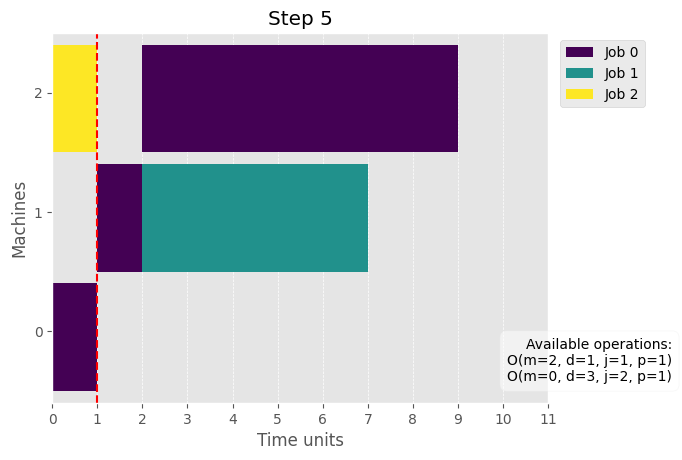

------------------- Step 6 -------------------
Scheduled operation: S-Op(operation=O(m=0, d=3, j=2, p=1), start_time=1, machine_id=0)
Current time: 7
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0               -7.0       1.0          1.0            0.0          1.0
1      0.0               -6.0       1.0          1.0            0.0          1.0
2      0.0               -5.0       7.0          1.0            0.0          0.0
3      1.0                2.0       2.0          0.0            0.0          0.0
4      0.0               -5.0       5.0          1.0            0.0          1.0
5      1.0                2.0       1.0          0.0            0.0          0.0
6      0.0                3.0       1.0          0.0            1.0          0.0
7      0.0               -7.0       0.0          1.0            0.0          1.0
8      0.0               -6.0      -3.0          1.0      

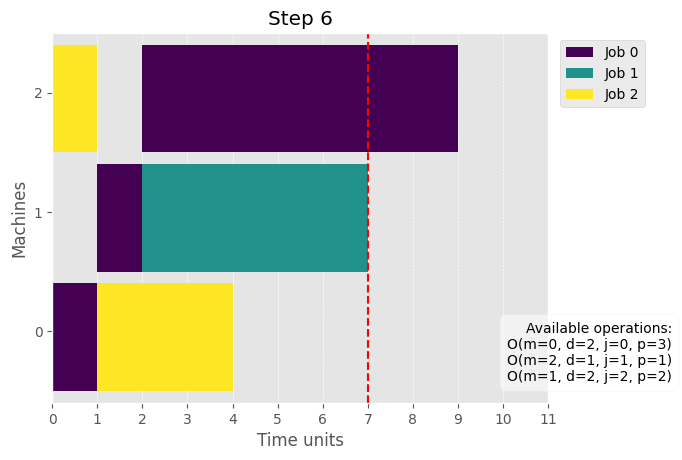

------------------- Step 7 -------------------
Scheduled operation: S-Op(operation=O(m=0, d=2, j=0, p=3), start_time=9, machine_id=0)
Current time: 7
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0               -7.0       1.0          1.0            0.0          1.0
1      0.0               -6.0       1.0          1.0            0.0          1.0
2      0.0               -5.0       7.0          1.0            0.0          0.0
3      0.0                2.0       2.0          1.0            0.0          0.0
4      0.0               -5.0       5.0          1.0            0.0          1.0
5      1.0                2.0       1.0          0.0            0.0          0.0
6      0.0                4.0       1.0          0.0            1.0          0.0
7      0.0               -7.0       0.0          1.0            0.0          1.0
8      0.0               -6.0      -3.0          1.0      

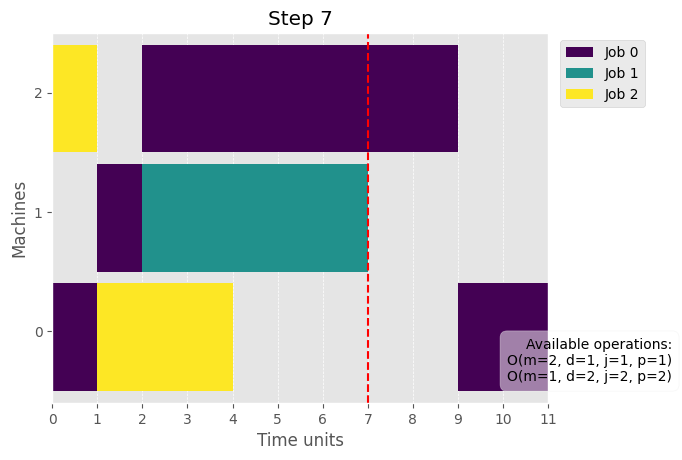

------------------- Step 8 -------------------
Scheduled operation: S-Op(operation=O(m=2, d=1, j=1, p=1), start_time=9, machine_id=2)
Current time: 7
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0               -7.0       1.0          1.0            0.0          1.0
1      0.0               -6.0       1.0          1.0            0.0          1.0
2      0.0               -5.0       7.0          1.0            0.0          0.0
3      0.0                2.0       2.0          1.0            0.0          0.0
4      0.0               -5.0       5.0          1.0            0.0          1.0
5      0.0                2.0       1.0          1.0            0.0          0.0
6      1.0                4.0       1.0          0.0            0.0          0.0
7      0.0               -7.0       0.0          1.0            0.0          1.0
8      0.0               -6.0      -3.0          1.0      

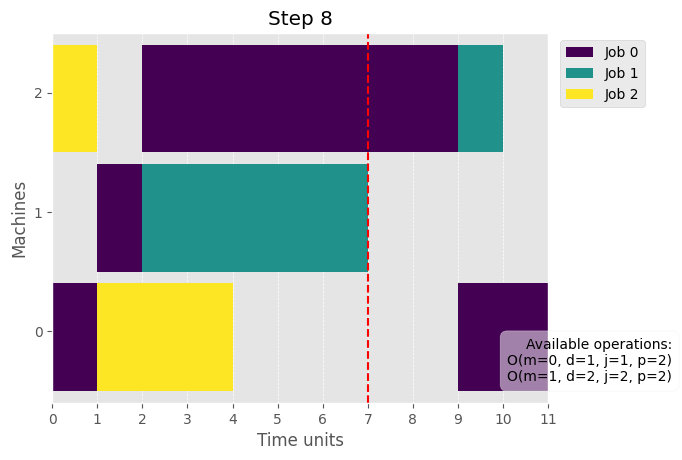

------------------- Step 9 -------------------
Scheduled operation: S-Op(operation=O(m=1, d=2, j=2, p=2), start_time=7, machine_id=1)
Current time: 11
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0              -11.0       1.0          1.0            0.0          1.0
1      0.0              -10.0       1.0          1.0            0.0          1.0
2      0.0               -9.0       7.0          1.0            0.0          1.0
3      0.0               -2.0       2.0          1.0            0.0          1.0
4      0.0               -9.0       5.0          1.0            0.0          1.0
5      0.0               -2.0       1.0          1.0            0.0          1.0
6      1.0                0.0       1.0          0.0            0.0          0.0
7      0.0              -11.0       0.0          1.0            0.0          1.0
8      0.0              -10.0      -3.0          1.0     

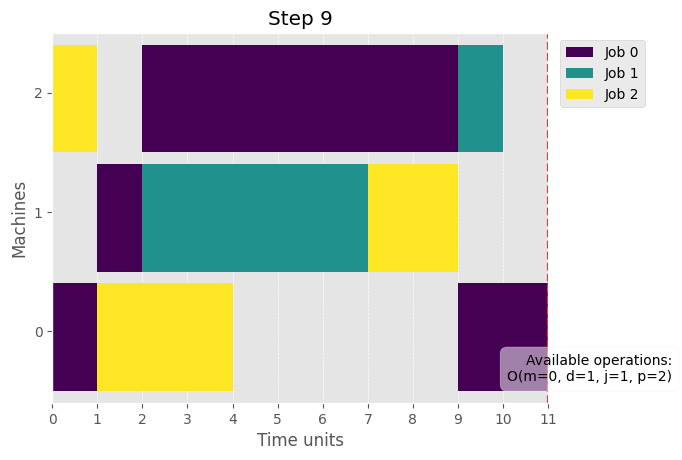

------------------- Step 10 -------------------
Scheduled operation: S-Op(operation=O(m=0, d=1, j=1, p=2), start_time=11, machine_id=0)
Current time: 12
CompositeFeatureObserver:
------------------------
operations:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob  IsCompleted
0      0.0              -12.0       1.0          1.0            0.0          1.0
1      0.0              -11.0       1.0          1.0            0.0          1.0
2      0.0              -10.0       7.0          1.0            0.0          1.0
3      0.0               -3.0       2.0          1.0            0.0          1.0
4      0.0              -10.0       5.0          1.0            0.0          1.0
5      0.0               -3.0       1.0          1.0            0.0          1.0
6      0.0               -1.0       0.0          1.0            0.0          1.0
7      0.0              -12.0       0.0          1.0            0.0          1.0
8      0.0              -11.0      -3.0          1.0   

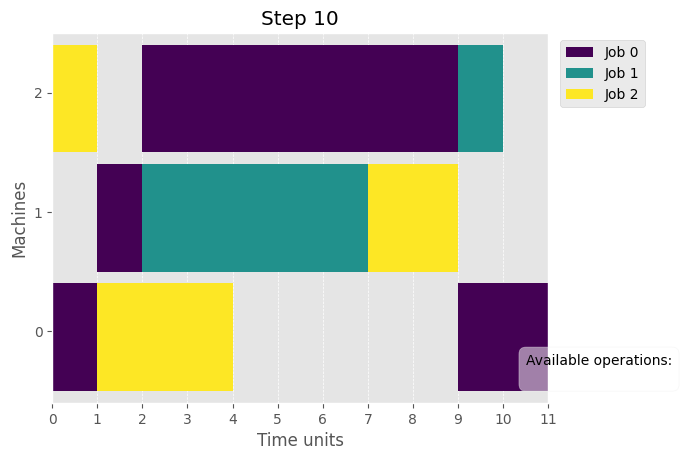

In [10]:
solver = DispatchingRuleSolver("most_work_remaining")
plot_function = plot_gantt_chart_wrapper(show_available_operations=True)
for i in range(len(dispatcher.unscheduled_operations())):
    solver.step(dispatcher)
    print(f"------------------- Step {i + 1} -------------------")
    scheduled_operation = history.history[-1]
    print(f"Scheduled operation: {scheduled_operation}")
    print(f"Current time: {dispatcher.current_time()}")
    print(composite)
    plot_function(
        dispatcher.schedule,
        makespan=11,
        available_operations=dispatcher.available_operations(),
        current_time=dispatcher.current_time(),
    )
    plt.title(f"Step {i + 1}")
    plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Gantt Chart for Example instance'}, xlabel='Time units', ylabel='Machines'>)

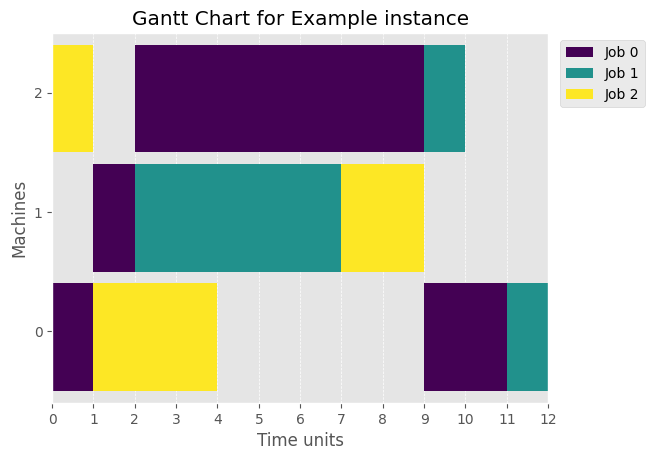

In [11]:
plot_gantt_chart(dispatcher.schedule)